# JAGWINDER SINGH

## Complete the notebook
(version 07/24/2020)

## Adding other economic indicators

### What is one of the main things to consider when adding other economic indicators?  
(enter your answers here)

1) Enter all imports needed & code to read the Quandl API key from a text file (quandlapikey.txt) and place it into a variable:### Enter your imports

In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as web
api_key = open('quandlapikey.txt','r').read()

### Load data (States HPI)

2) From a previous workbook, upload to a Dataframe the States HPI data (fifty_states_HPI_raw_data.pickle).  
*If you do not have the file, write the code to bulk download the 50 US state HPI into a dataframe and pickle.  
Print head, tail and plot (do not show legend)

                   AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.114705  34.421540  29.046774  37.880354  15.825793  19.751302   
1975-02-28  35.474313  34.892399  29.514476  37.912244  15.890920  19.971785   
1975-03-31  35.850593  35.379596  29.932568  37.926996  16.085233  20.204625   
1975-04-30  36.255857  35.909304  30.216816  37.949476  16.396892  20.424926   
1975-05-31  36.595193  36.530932  30.311531  38.036095  16.647444  20.589019   

                   CT         DE         DC         FL  ...         SD  \
Date                                                    ...              
1975-01-31  24.245907  27.927768  19.449001  30.820782  ...  35.898992   
1975-02-28  24.774307  28.015228  19.300097  32.064594  ...  35.730978   
1975-03-31  25.202022  28.104499  19.180809  33.923032  ...  35.564488   
1975-04-30  25.486384  28.204423  19.147148  36.211450  ...  35.40380

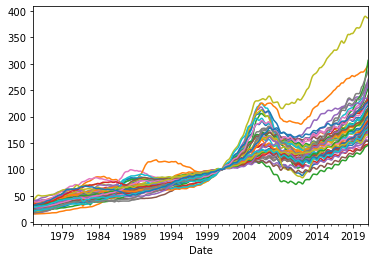

In [2]:
fifty_states_abbv = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')
fifty_states_abbv = fifty_states_abbv[0]['Postal Code']
    

fifty_states_HPI_raw_data = pd.DataFrame()


for abbv in fifty_states_abbv:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
    df = df[['NSA Value']]
    df.rename(columns={'NSA Value':abbv}, inplace=True)
    if fifty_states_HPI_raw_data.empty:
        fifty_states_HPI_raw_data = df
    else:
        fifty_states_HPI_raw_data = fifty_states_HPI_raw_data.join(df)
    

fifty_states_HPI_raw_data.to_pickle ('fifty_states_HPI_raw_data.pickle')

print(fifty_states_HPI_raw_data.head())
print(fifty_states_HPI_raw_data.tail())

fifty_states_HPI_raw_data.plot()
plt.legend().remove()
plt.show()



### Load data (30 Year Mortgage Rate)

3) From a previous workbook, upload to a Dataframe the 30 Year Mortgage Rate (30_Year_Mortgage_Rate_raw_data.pickle).  
*If you do not have the file, write the code to download the 30 Year Mortgage Rate (starting on January 1st 1975) into a dataframe (move the date to the end of the month) and pickle (30_Year_Mortgage_Rate_raw_data.pickle).  
Print head, tail and plot (show legend)

             M30
Date            
1975-01-31  9.43
1975-02-28  9.11
1975-03-31  8.90
1975-04-30  8.82
1975-05-31  8.91
             M30
Date            
2016-05-31  3.60
2016-06-30  3.57
2016-07-31  3.44
2016-08-31  3.44
2016-09-30  3.46


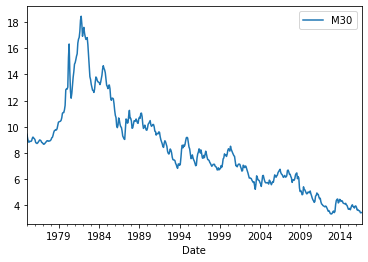

In [3]:

USA_HPI_raw_data = quandl.get("FMAC/HPI_USA", authtoken=api_key) # gets USA HPI
USA_HPI_raw_data = USA_HPI_raw_data[['NSA Value']]
USA_HPI_raw_data.rename(columns={'NSA Value':'HPI_USA'}, inplace=True)


USA_HPI_raw_data.to_pickle ('USA_HPI_raw_data.pickle')


M30_df = quandl.get("FMAC/MORTG", trim_start="1975-01-01", authtoken=api_key)
M30_df.rename(columns={'Value':'M30'}, inplace=True)
M30_df = M30_df.resample('M').mean()

print(M30_df.head())
print(M30_df.tail())
M30_df.to_pickle ('M30_df.pickle')
M30_df.plot()
plt.legend()
plt.show()




### Load data (USA HPI)

4) From a previous workbook, upload to a Dataframe the USA HPI data (USA_HPI_raw_data.pickle).  
*If you do not have the file, write the code to bulk download the USA HPI (starting on January 1st 1975) into a dataframe and pickle.  
Print head, tail and plot (show legend)

              HPI_USA
Date                 
1975-01-31  23.652821
1975-02-28  23.805367
1975-03-31  24.056126
1975-04-30  24.379736
1975-05-31  24.563593
               HPI_USA
Date                  
2020-10-31  214.479083
2020-11-30  216.251792
2020-12-31  217.677496
2021-01-31  219.261259
2021-02-28  221.025139


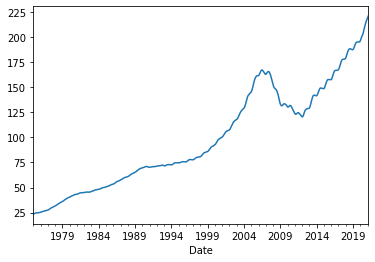

In [4]:
USA_HPI_raw_data = quandl.get("FMAC/HPI_USA", authtoken=api_key) 
USA_HPI_raw_data = USA_HPI_raw_data[['NSA Value']]
USA_HPI_raw_data.rename(columns={'NSA Value':'HPI_USA'}, inplace=True)

USA_HPI_raw_data.to_pickle ('USA_HPI_raw_data.pickle')

print(USA_HPI_raw_data.head())
print(USA_HPI_raw_data.tail())

USA_HPI_raw_data.plot()
plt.legend().remove()
plt.show()

### Load data (S&P 500)

5) Download the S&P 500 data into a dataframe starting on January 1st 1975.  
Print head, tail and plot (show legend)

Date
1975-01-31    72.564091
1975-02-28    80.096842
1975-03-31    83.831999
1975-04-30    84.723182
1975-05-31    90.096190
Freq: M, Name: SP500, dtype: float64
Date
2020-12-31    3695.310014
2021-01-31    3793.748432
2021-02-28    3883.432116
2021-03-31    3910.508280
2021-04-30    4111.615456
Freq: M, Name: SP500, dtype: float64


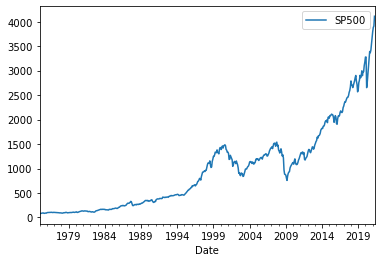

In [5]:
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime.now()
SP500_df = web.DataReader("^GSPC", "yahoo", start, end)
SP500_df=SP500_df.resample('M').mean()
SP500_df.rename(columns={'Adj Close':'SP500'}, inplace=True)
SP500_df = SP500_df['SP500']


SP500_df.to_pickle ('SP500_df.pickle')
print(SP500_df.head())
print(SP500_df.tail())

SP500_df.plot()
plt.legend()
plt.show()


### Load data (GDP)

6) Download the GDP data into a dataframe starting on January 1st 1975.  
Print head, tail and plot (show legend)

              US_GDP
Date                
1975-01-31  5548.156
1975-02-28  5548.156
1975-03-31  5548.156
1975-04-30  5587.800
1975-05-31  5587.800
               US_GDP
Date                 
2020-06-30  17302.511
2020-07-31  18596.521
2020-08-31  18596.521
2020-09-30  18596.521
2020-10-31  18794.426


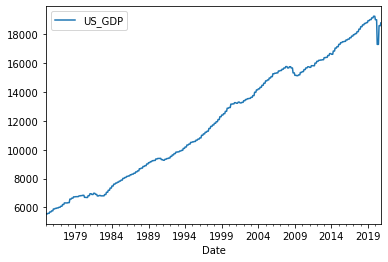

In [6]:
US_GDP_df = quandl.get("FRED/GDPC1", trim_start="1975-01-01", authtoken=api_key)
US_GDP_df=US_GDP_df.resample('M').mean() 
US_GDP_df.fillna(method='ffill',inplace=True)
US_GDP_df.rename(columns={'Value':'US_GDP'}, inplace=True)



US_GDP_df.to_pickle ('US_GDP_df.pickle')
print(US_GDP_df.head())
print(US_GDP_df.tail())

US_GDP_df.plot()
plt.legend()
plt.show()


### Load data (Unemployment Rate)

5) Download the Unemployment Rate data into a dataframe starting on January 1st 1975.  
Print head, tail and plot (show legend)

            US_Unemployment
Date                       
1975-01-31              8.1
1975-02-28              8.1
1975-03-31              8.6
1975-04-30              8.8
1975-05-31              9.0
            US_Unemployment
Date                       
2020-11-30              6.7
2020-12-31              6.7
2021-01-31              6.3
2021-02-28              6.2
2021-03-31              6.0


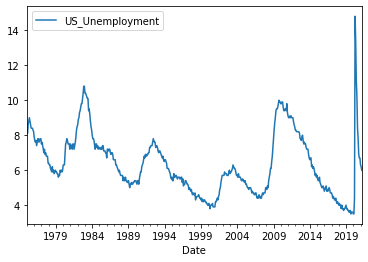

In [7]:

US_Unemployment_df = quandl.get("FRED/UNRATE", trim_start="1975-01-01", authtoken=api_key)
US_Unemployment_df = US_Unemployment_df.resample('M').mean()
US_Unemployment_df.rename(columns={'Value':'US_Unemployment'}, inplace=True)


US_Unemployment_df.to_pickle ('US_Unemployment_df.pickle')
print(US_Unemployment_df.head())
print(US_Unemployment_df.tail())

US_Unemployment_df.plot()
plt.legend()
plt.show()


### Combine all DataFrames (States HPI, USA HPI, 30 YR Mort, S&P 500, USA GDP, USA Unemployment Rate)

6) Combine all DataFrames (States HPI, USA HPI, 30 YR Mort, S&P 500, USA GDP, USA Unemployment Rate)  
Print the head

In [8]:
fifty_states_HPI_raw_data = pd.read_pickle('fifty_states_HPI_raw_data.pickle')
USA_HPI_raw_data = pd.read_pickle('USA_HPI_raw_data.pickle')
M30_df = pd.read_pickle('M30_df.pickle')
SP500_df = pd.read_pickle('SP500_df.pickle')
US_GDP_df = pd.read_pickle('US_GDP_df.pickle')
US_Unemployment_df = pd.read_pickle('US_Unemployment_df.pickle')
All_Together_raw_data = fifty_states_HPI_raw_data.join([USA_HPI_raw_data,M30_df,SP500_df, US_GDP_df, US_Unemployment_df])
print(All_Together_raw_data.head())

                   AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.114705  34.421540  29.046774  37.880354  15.825793  19.751302   
1975-02-28  35.474313  34.892399  29.514476  37.912244  15.890920  19.971785   
1975-03-31  35.850593  35.379596  29.932568  37.926996  16.085233  20.204625   
1975-04-30  36.255857  35.909304  30.216816  37.949476  16.396892  20.424926   
1975-05-31  36.595193  36.530932  30.311531  38.036095  16.647444  20.589019   

                   CT         DE         DC         FL  ...         VA  \
Date                                                    ...              
1975-01-31  24.245907  27.927768  19.449001  30.820782  ...  27.767094   
1975-02-28  24.774307  28.015228  19.300097  32.064594  ...  28.077629   
1975-03-31  25.202022  28.104499  19.180809  33.923032  ...  28.300488   
1975-04-30  25.486384  28.204423  19.147148  36.211450  ...  28.44926

### Saving the DataFrame

7) Saves the DataFrame by pickling

### Correlation

8) Display a correlation table between all data columns

In [9]:
print(All_Together_raw_data.head())
print(All_Together_raw_data[['HPI_USA','M30','SP500','US_GDP','US_Unemployment']].head())

                   AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.114705  34.421540  29.046774  37.880354  15.825793  19.751302   
1975-02-28  35.474313  34.892399  29.514476  37.912244  15.890920  19.971785   
1975-03-31  35.850593  35.379596  29.932568  37.926996  16.085233  20.204625   
1975-04-30  36.255857  35.909304  30.216816  37.949476  16.396892  20.424926   
1975-05-31  36.595193  36.530932  30.311531  38.036095  16.647444  20.589019   

                   CT         DE         DC         FL  ...         VA  \
Date                                                    ...              
1975-01-31  24.245907  27.927768  19.449001  30.820782  ...  27.767094   
1975-02-28  24.774307  28.015228  19.300097  32.064594  ...  28.077629   
1975-03-31  25.202022  28.104499  19.180809  33.923032  ...  28.300488   
1975-04-30  25.486384  28.204423  19.147148  36.211450  ...  28.44926

9) Display a correlation table between USA HPI, 30 YR Mort, S&P 500, USA GDP and the USA Unemployment Rate

In [10]:
print(All_Together_raw_data.corr())
print(All_Together_raw_data[['HPI_USA','M30','SP500','US_GDP','US_Unemployment']].corr()) # Non-States columns

                       AL        AK        AZ        AR        CA        CO  \
AL               1.000000  0.961673  0.954056  0.996774  0.957616  0.955630   
AK               0.961673  1.000000  0.931815  0.976194  0.941697  0.948637   
AZ               0.954056  0.931815  1.000000  0.952854  0.984111  0.946867   
AR               0.996774  0.976194  0.952854  1.000000  0.960390  0.963325   
CA               0.957616  0.941697  0.984111  0.960390  1.000000  0.954757   
CO               0.955630  0.948637  0.946867  0.963325  0.954757  1.000000   
CT               0.940909  0.888731  0.892823  0.934368  0.916914  0.837245   
DE               0.982129  0.948348  0.944446  0.978261  0.961443  0.909900   
DC               0.935042  0.968807  0.932986  0.950269  0.959073  0.964363   
FL               0.949272  0.927612  0.995916  0.948443  0.991051  0.941050   
GA               0.981215  0.926876  0.968575  0.975556  0.969077  0.968763   
HI               0.959993  0.959963  0.945275  0.965

10) Display a correlation table between all states and the S&P 500 (show only the S&P 500 column)

In [11]:
print(All_Together_raw_data.corr())
print(All_Together_raw_data[['SP500']].corr()) # Non-States columns

                       AL        AK        AZ        AR        CA        CO  \
AL               1.000000  0.961673  0.954056  0.996774  0.957616  0.955630   
AK               0.961673  1.000000  0.931815  0.976194  0.941697  0.948637   
AZ               0.954056  0.931815  1.000000  0.952854  0.984111  0.946867   
AR               0.996774  0.976194  0.952854  1.000000  0.960390  0.963325   
CA               0.957616  0.941697  0.984111  0.960390  1.000000  0.954757   
CO               0.955630  0.948637  0.946867  0.963325  0.954757  1.000000   
CT               0.940909  0.888731  0.892823  0.934368  0.916914  0.837245   
DE               0.982129  0.948348  0.944446  0.978261  0.961443  0.909900   
DC               0.935042  0.968807  0.932986  0.950269  0.959073  0.964363   
FL               0.949272  0.927612  0.995916  0.948443  0.991051  0.941050   
GA               0.981215  0.926876  0.968575  0.975556  0.969077  0.968763   
HI               0.959993  0.959963  0.945275  0.965

### Graphing specific columns

11) Plot the USA HPI, 30 YR Mort, S&P 500, USA GDP and the USA Unemployment Rate (use the raw data not the correlation table)

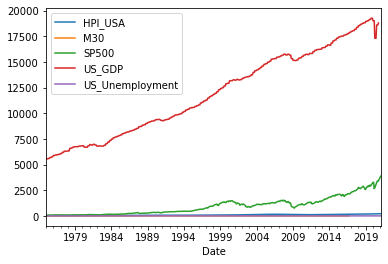

In [12]:
All_Together_raw_data[['HPI_USA','M30','SP500','US_GDP','US_Unemployment']].plot()
plt.legend()
plt.show()